In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [64]:
df = pd.read_csv("AIML Dataset.csv")

## Data Analysis

In [65]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [67]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [68]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [69]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [70]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [71]:
fraud_percentage = round(df["isFraud"].value_counts()[1] / df.shape[0] * 100, 2)

In [72]:
print(f"Percentage of fraudulent transactions: {fraud_percentage}%")

Percentage of fraudulent transactions: 0.13%


Text(0, 0.5, 'Count')

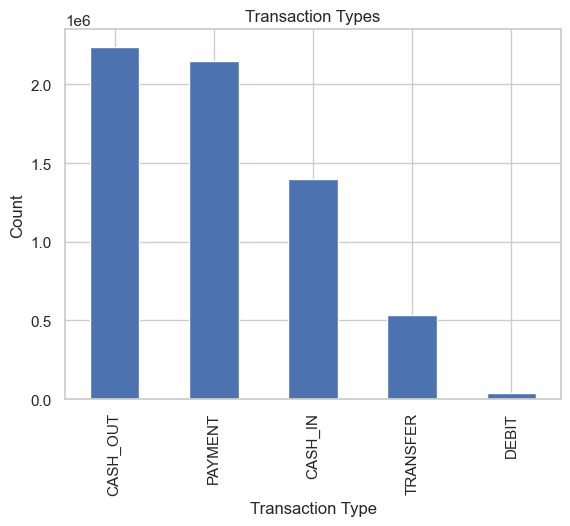

In [73]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

Text(0, 0.5, 'Fraud Rate')

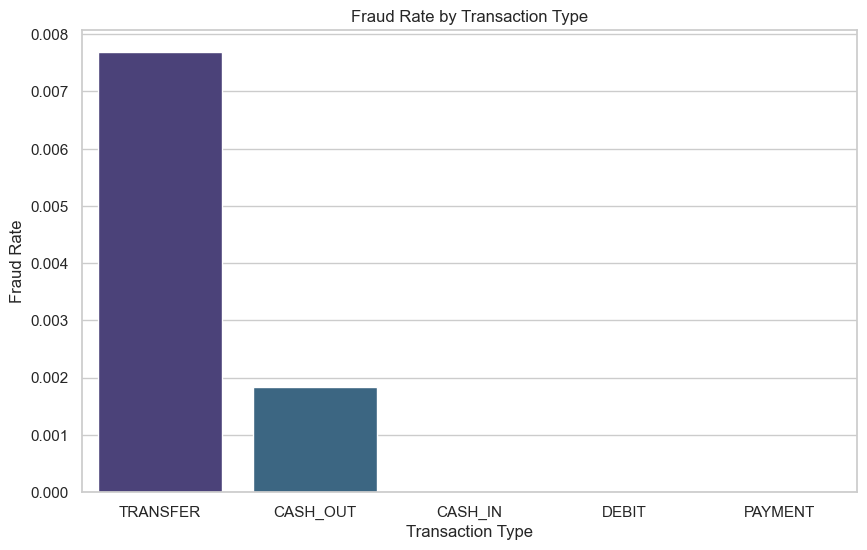

In [74]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, palette="viridis")
plt.title("Fraud Rate by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")

In [75]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

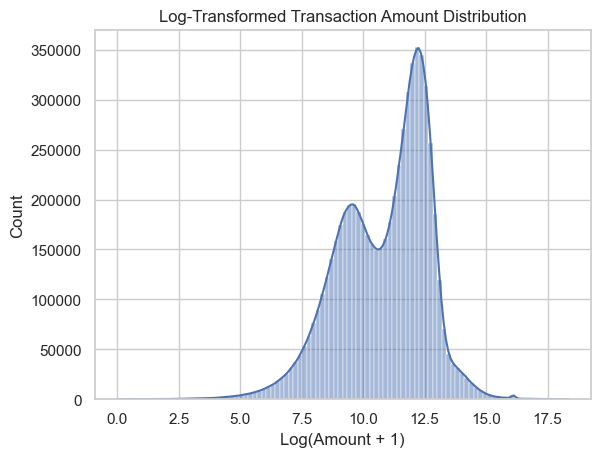

In [76]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True)
plt.title("Log-Transformed Transaction Amount Distribution")
plt.xlabel("Log(Amount + 1)")
plt.show()

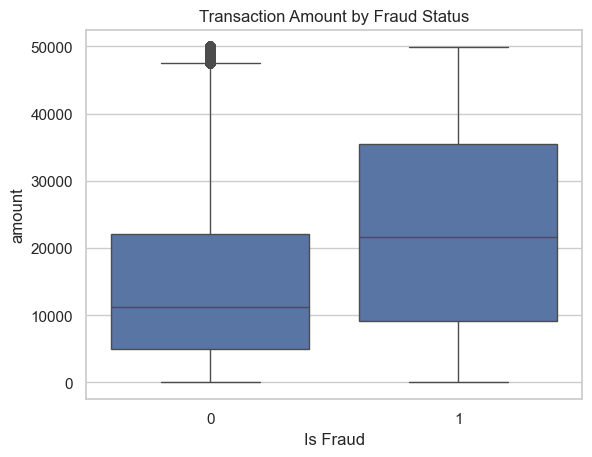

In [77]:
sns.boxplot(data = df[df["amount"] < 50000], x= "isFraud", y="amount")
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Is Fraud")
plt.show()

In [78]:
df["balanceDiffOrg"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["oldbalanceDest"] - df["newbalanceDest"]

In [79]:
(df["balanceDiffOrg"] < 0).sum()

1399253

In [80]:
(df["balanceDiffDest"] < 0).sum()

2806464

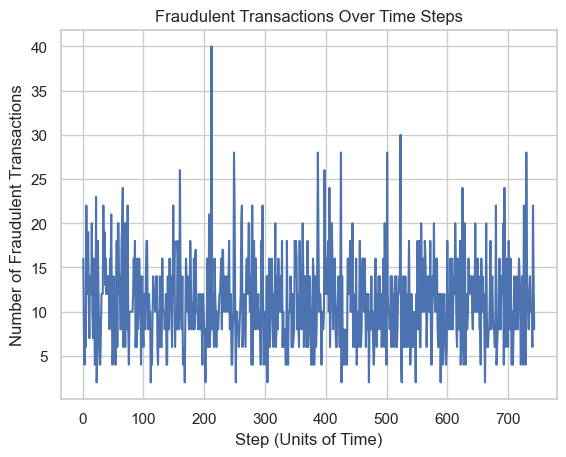

In [81]:
fraud_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(fraud_per_step.index, fraud_per_step.values, label="Fraud per step")
plt.title("Fraudulent Transactions Over Time Steps")
plt.xlabel("Step (Units of Time)")
plt.ylabel("Number of Fraudulent Transactions")
plt.grid(True)
plt.show()

In [82]:
df.drop(columns="step", inplace=True)

In [83]:
top_senders = df["nameOrig"].value_counts().head(10)
top_receivers = df["nameDest"].value_counts().head(10)

In [84]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [85]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [86]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [87]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [88]:
fraud_by_type = df[df["type"].isin(["TRANSFER", "CASH_OUT"]) ]

In [89]:
fraud_by_type["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

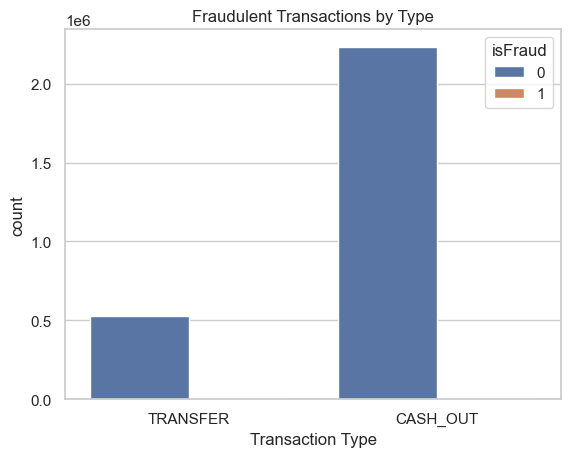

In [90]:
sns.countplot(data=fraud_by_type, x="type", hue="isFraud")
plt.title("Fraudulent Transactions by Type")
plt.xlabel("Transaction Type")
plt.show()

In [91]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [92]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


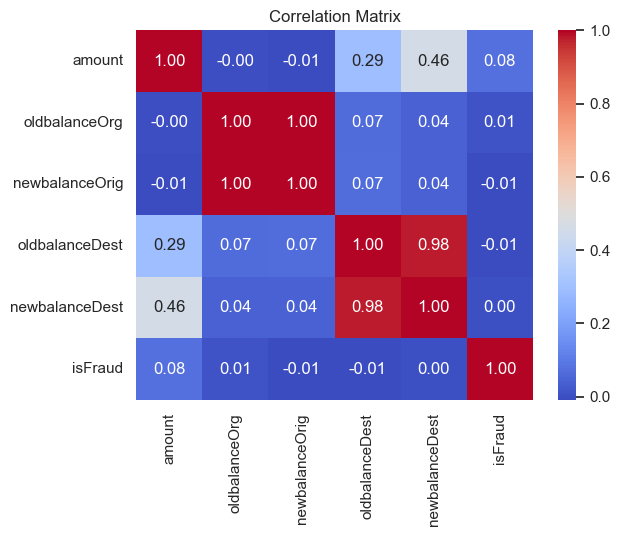

In [93]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [94]:
zero_after_transfer = df[(df["oldbalanceOrg"] > 0) & (df["newbalanceOrig"] == 0) & (df["type"].isin(["TRANSFER", "CASH_OUT"]))]

In [95]:
len(zero_after_transfer)

1188074

## Feature Engineering & Model Training

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [97]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [98]:
categorial_features = ["type"]
numerical_features = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [99]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [101]:
preproccessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorial_features)
    ],
    remainder="drop"
)

In [102]:
pipeline = Pipeline(steps=[
    ("preprocessor", preproccessor),
    ("classifier", LogisticRegression(class_weight="balanced", max_iter=1000))
]) 

In [103]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [104]:
y_pred = pipeline.predict(X_test)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [107]:
confusion_matrix(y_test, y_pred)

array([[1804823,  101499],
       [    151,    2313]], dtype=int64)

The model has low precision for class 1 (fraud), meaning it often predicts fraud incorrectly. This happens because the dataset is unbalanced. Still, i will use it for testing purposes.

In [109]:
accurasy = pipeline.score(X_test, y_test) * 100
print(f"Model Accuracy: {accurasy:.2f}%")

Model Accuracy: 94.67%


## Exporting pipeline

In [110]:
import joblib

In [111]:
joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']